In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
# Importing Pulsar dataset and defined as 'pulsar'
pulsar = pd.read_csv('/Users/ET/Downloads/pulsar_stars.csv')
pulsar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [4]:
# Simplifying attributes names
pulsar.columns = ['mean_int','std_int','ex_int','sk_int','mean_DM','std_DM','ex_DM','sk_DM','target_class']

In [5]:
# Data dimensions
print("Number of rows    :",pulsar.shape[0])
print("Number of columns :",pulsar.shape[1])

Number of rows    : 17898
Number of columns : 9


In [6]:
# Data Information
print("Data Info  :",pulsar.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
mean_int        17898 non-null float64
std_int         17898 non-null float64
ex_int          17898 non-null float64
sk_int          17898 non-null float64
mean_DM         17898 non-null float64
std_DM          17898 non-null float64
ex_DM           17898 non-null float64
sk_DM           17898 non-null float64
target_class    17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB
Data Info  : None


In [7]:
# Checking missing values
print(pulsar.isnull().sum())

mean_int        0
std_int         0
ex_int          0
sk_int          0
mean_DM         0
std_DM          0
ex_DM           0
sk_DM           0
target_class    0
dtype: int64


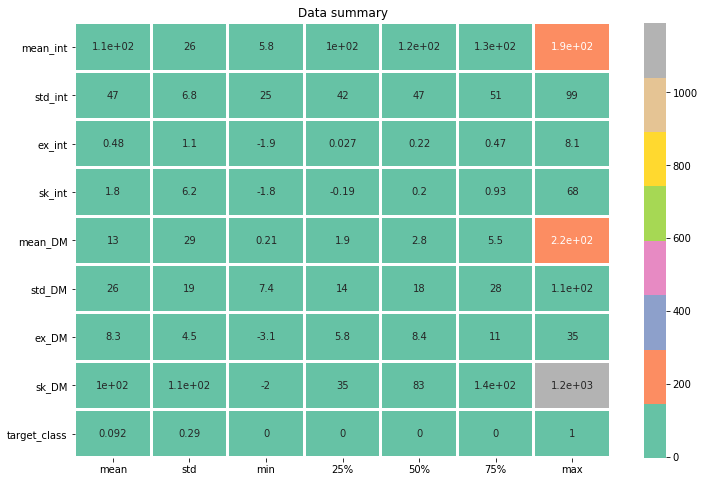

In [8]:
# No missing values, then data summary as follow
plt.figure(figsize=(12,8))
sns.heatmap(pulsar.describe()[1:].transpose(),
            annot=True,linecolor="w",
            linewidth=2,cmap=sns.color_palette("Set2"))
plt.title("Data summary")
plt.show()

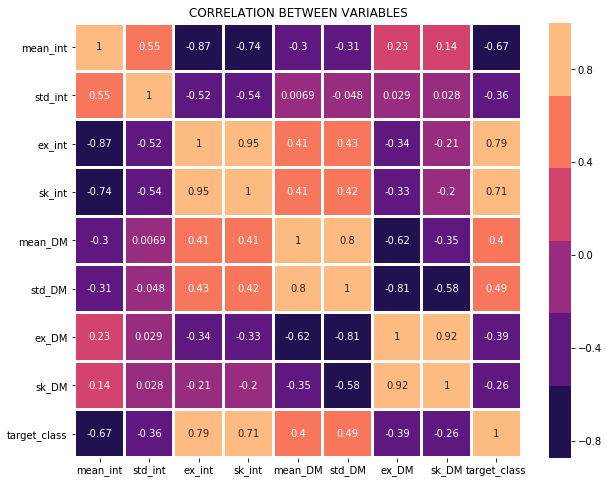

In [9]:
# Checking correlations between variables
correlation = pulsar.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,
            cmap=sns.color_palette("magma"),
            linewidth=2,edgecolor="k")
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()

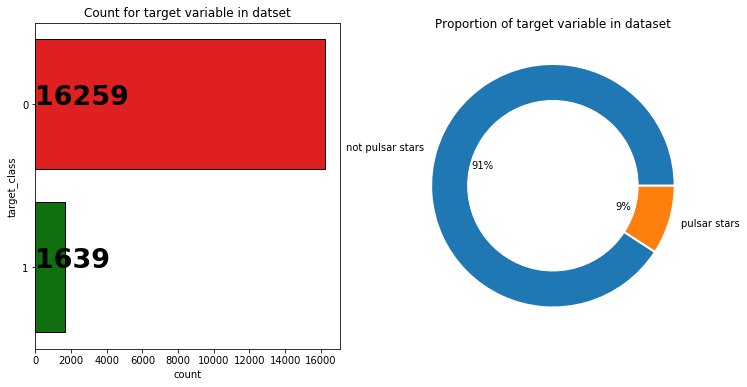

In [10]:
# Proportion of target variable in dataset

plt.figure(figsize=(12,6))
plt.subplot(121)
ax = sns.countplot(y = pulsar["target_class"],
                   palette=["r","g"],
                   linewidth=1,
                   edgecolor="k"*2)
for i,j in enumerate(pulsar["target_class"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize = 27)
plt.title("Count for target variable in datset")


plt.subplot(122)
plt.pie(pulsar["target_class"].value_counts().values,
        labels=["not pulsar stars","pulsar stars"],
        autopct="%1.0f%%",wedgeprops={"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.subplots_adjust(wspace = .2)
plt.title("Proportion of target variable in dataset")
plt.show()

KeyError: "Columns not found: 'std_profile', 'skewness_dmsnr_curve', 'mean_profile', 'kurtosis_dmsnr_curve', 'std_dmsnr_curve', 'mean_dmsnr_curve', 'skewness_profile', 'kurtosis_profile'"

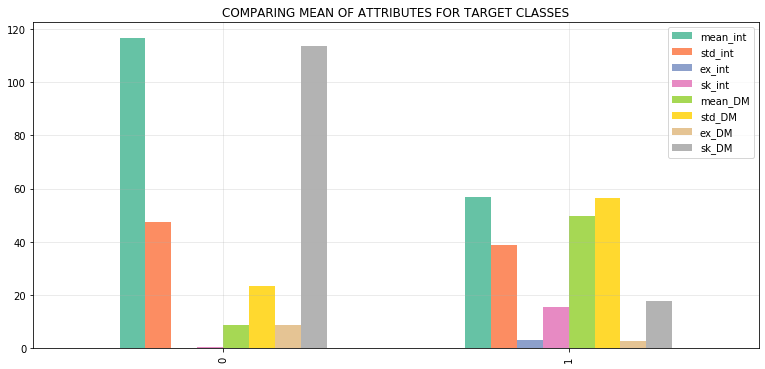

In [15]:
compare = pulsar.groupby("target_class")[['mean_int','std_int','ex_int','sk_int','mean_DM','std_DM','ex_DM','sk_DM']].mean().reset_index()


compare = compare.drop("target_class",axis =1)

compare.plot(kind="bar",width=.6,figsize=(13,6),colormap="Set2")
plt.grid(True,alpha=.3)
plt.title("COMPARING MEAN OF ATTRIBUTES FOR TARGET CLASSES")

compare1 = pulsar.groupby("target_class")[['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile',
                                        'mean_dmsnr_curve', 'std_dmsnr_curve', 'kurtosis_dmsnr_curve',
                                        'skewness_dmsnr_curve']].std().reset_index()
compare1 = compare1.drop("target_class",axis=1)
compare1.plot(kind="bar",width=.6,figsize=(13,6),colormap="Set2")
plt.grid(True,alpha=.3)
plt.title("COMPARING STANDARD DEVIATION OF ATTRIBUTES FOR TARGET CLASSES")
plt.show()

ValueError: Could not interpret input 'features'

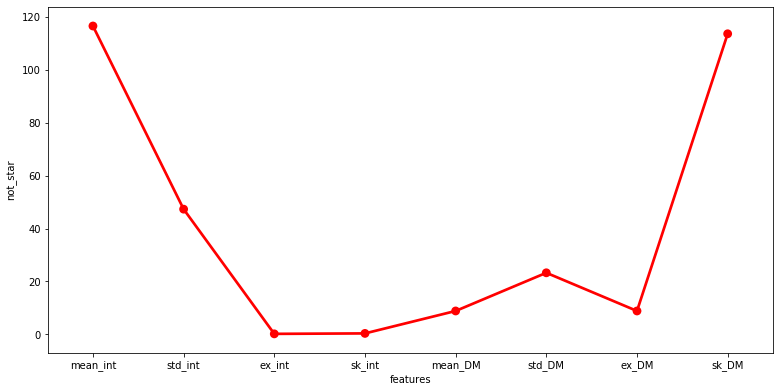

In [18]:
compare_mean = compare.transpose().reset_index()
compare_mean = compare_mean.rename(columns={'index':"features", 0:"not_star", 1:"star"})
plt.figure(figsize=(13,14))
plt.subplot(211)
sns.pointplot(x= "features",y="not_star",data=compare_mean,color="r")
sns.pointplot(x= "features",y="star",data=compare_mean,color="g")
plt.xticks(rotation =60)
plt.xlabel("")
plt.grid(True,alpha=.3)
plt.title("COMPARING MEAN OF ATTRIBUTES FOR TARGET CLASSES")

compare_std = compare1.transpose().reset_index()
compare_std = compare_std.rename(columns={'index':"features", 0:"not_star", 1:"star"})
plt.subplot(212)
sns.pointplot(x= "features",y="not_star",data=compare_std,color="r")
sns.pointplot(x= "features",y="star",data=compare_std,color="g")
plt.xticks(rotation =60)
plt.grid(True,alpha=.3)
plt.title("COMPARING STANDARD DEVIATION OF ATTRIBUTES FOR TARGET CLASSES")
plt.subplots_adjust(hspace =.4)
print ("[GREEN == STAR , RED == NOTSTAR]")
plt.show()

***************************************
DISTIBUTION OF VARIABLES IN DATA SET
***************************************


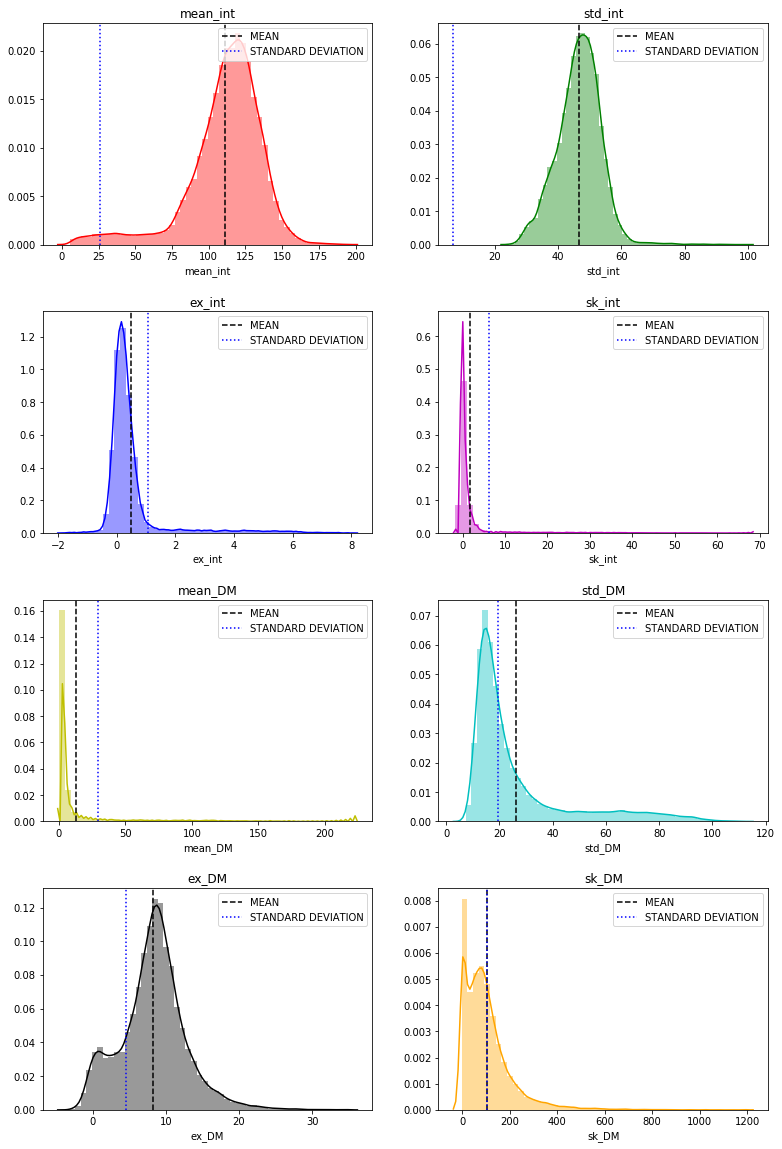

In [20]:
# Distribution of Variables in dataset
columns = ['mean_int','std_int','ex_int','sk_int','mean_DM','std_DM','ex_DM','sk_DM']
length  = len(columns)
colors  = ["r","g","b","m","y","c","k","orange"] 

plt.figure(figsize=(13,20))
for i,j,k in itertools.zip_longest(columns,range(length),colors):
    plt.subplot(length/2,length/4,j+1)
    sns.distplot(pulsar[i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    plt.axvline(pulsar[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    plt.axvline(pulsar[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="upper right")
    
print ("***************************************")
print ("DISTIBUTION OF VARIABLES IN DATA SET")
print ("***************************************")

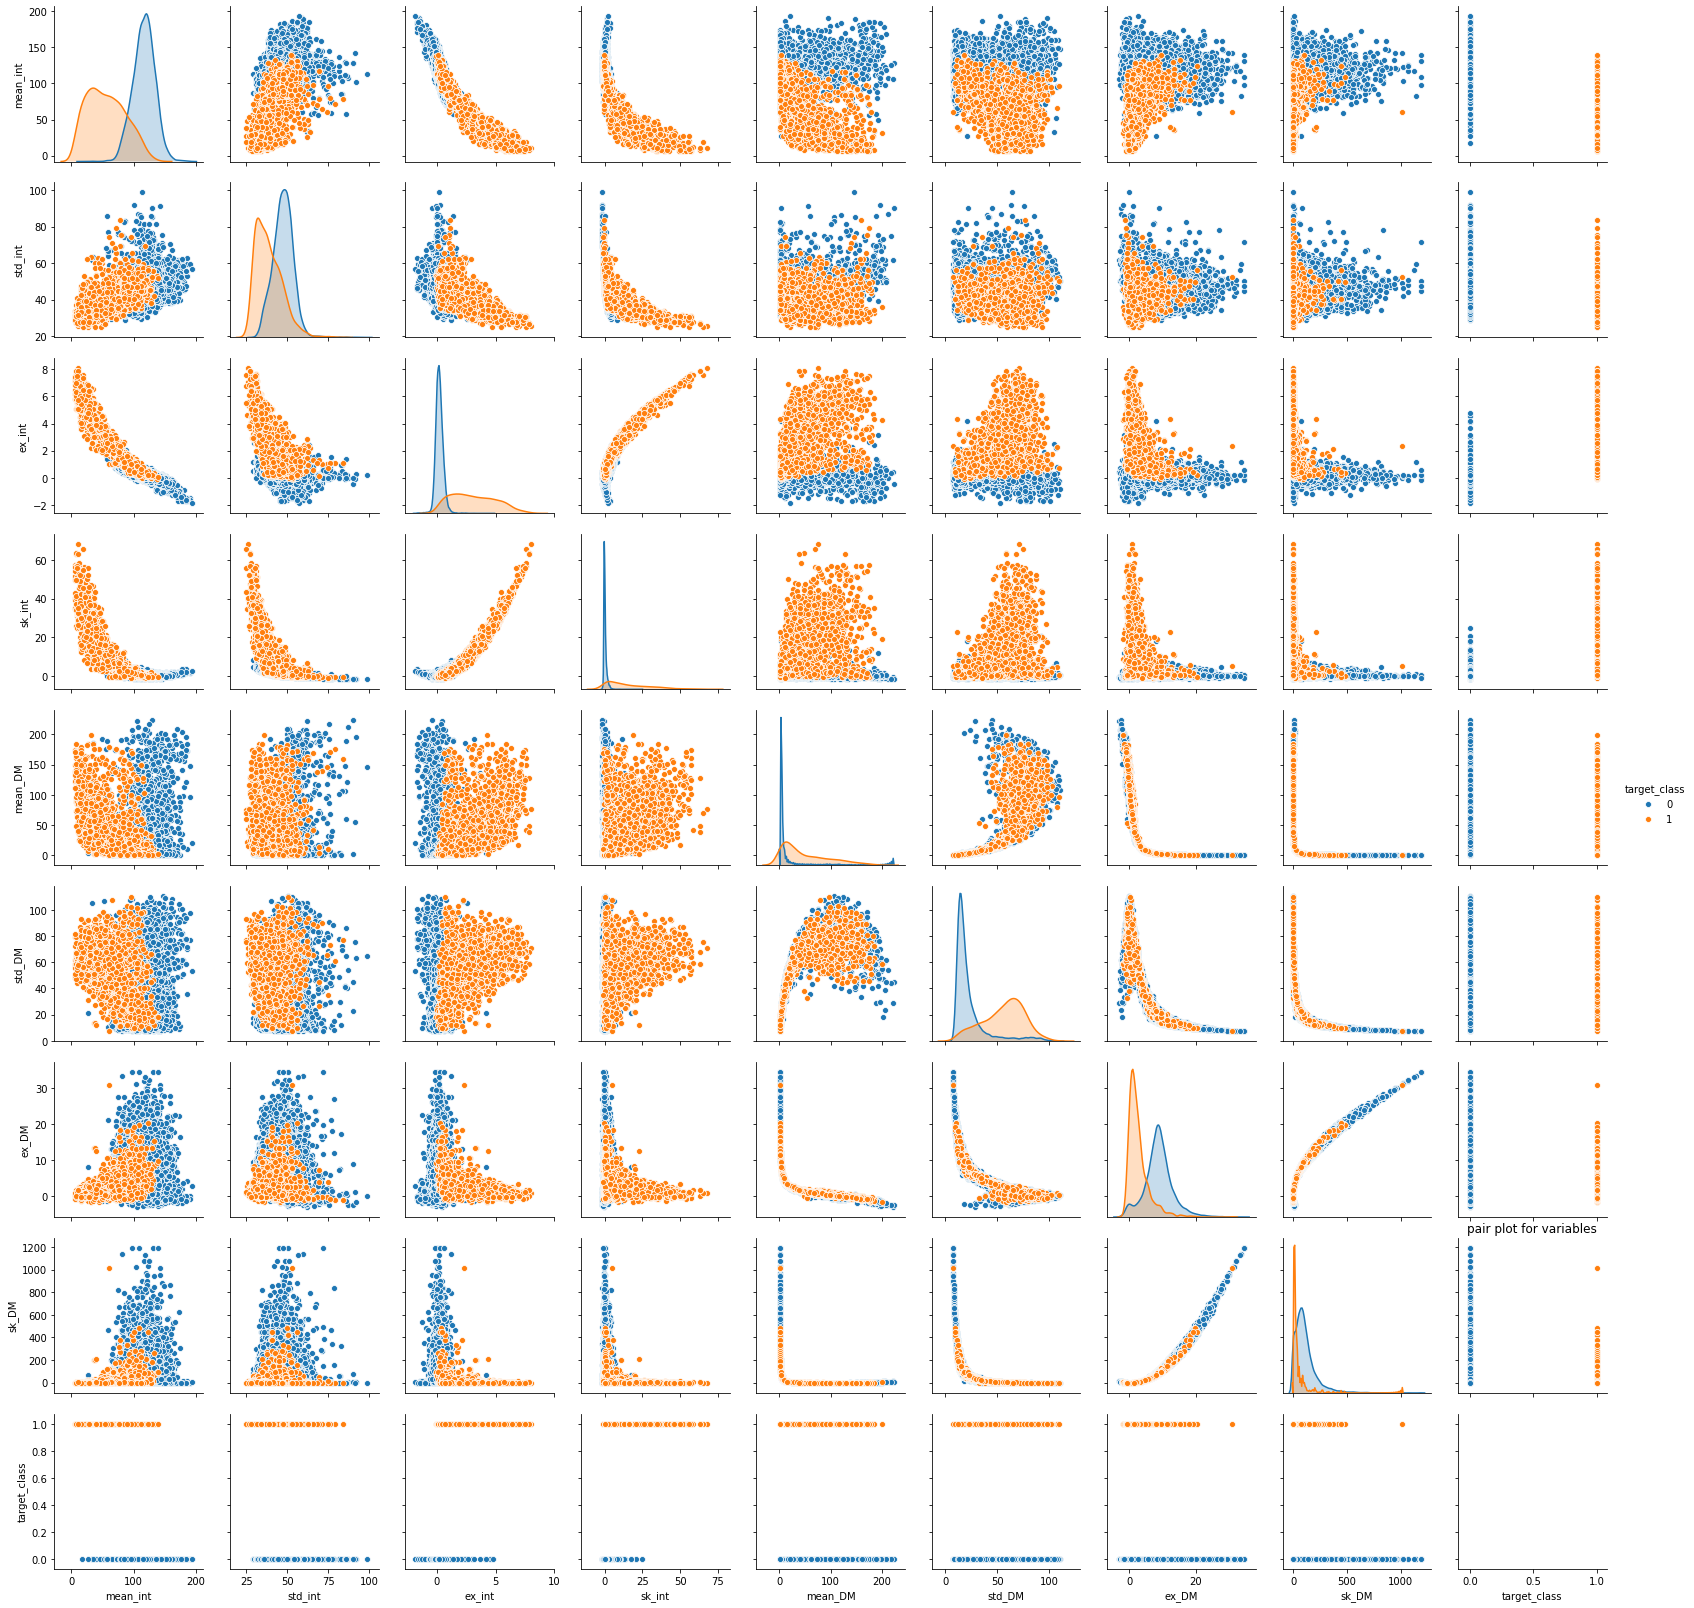

In [22]:
# Pair plot between all variables
sns.pairplot(pulsar,hue='target_class')
plt.title("pair plot for variables")
plt.show()

****************************************************
BOXPLOT FOR VARIABLES IN DATA SET WITH TARGET CLASS
****************************************************


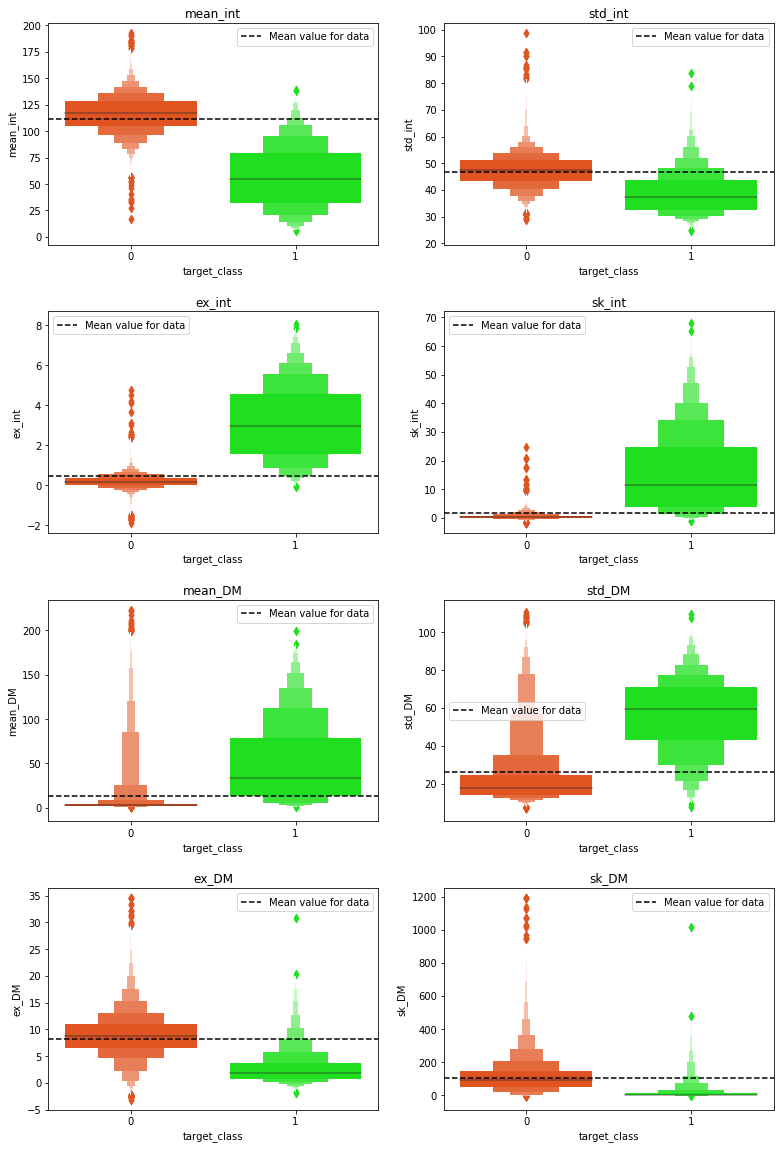

In [24]:
# BOXPLOT FOR VARIABLES IN DATA SET WITH TARGET CLASS
columns = [x for x in pulsar.columns if x not in ["target_class"]]
length  = len(columns)
plt.figure(figsize=(13,20))
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(4,2,j+1)
    sns.lvplot(x=pulsar["target_class"],y=pulsar[i],palette=["orangered","lime"])
    plt.title(i)
    plt.subplots_adjust(hspace=.3)
    plt.axhline(pulsar[i].mean(),linestyle = "dashed",color ="k",label ="Mean value for data")
    plt.legend(loc="best")
    
print ("****************************************************")
print ("BOXPLOT FOR VARIABLES IN DATA SET WITH TARGET CLASS")
print ("****************************************************")

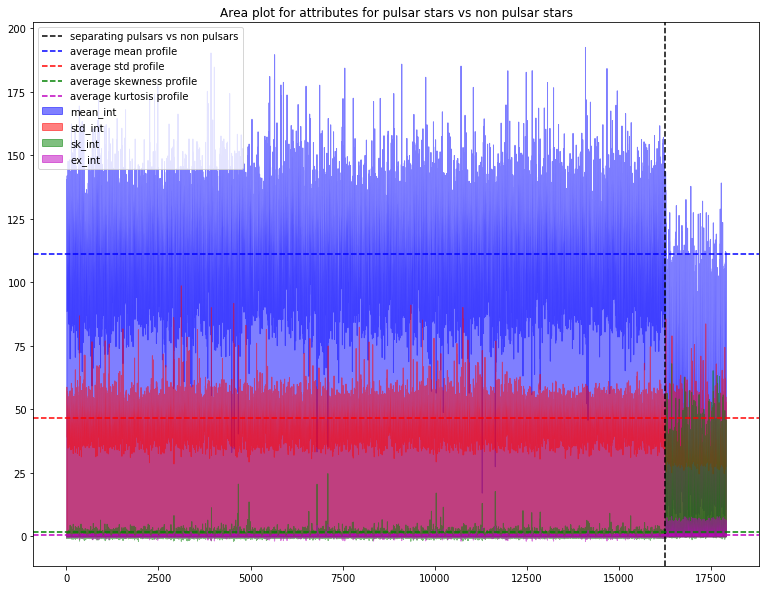

In [28]:
# Area plot for attributes of Type 0 and Type 1

st = pulsar[pulsar["target_class"] == 1].reset_index()
nst= pulsar[pulsar["target_class"] == 0].reset_index()
new = pd.concat([nst,st]).reset_index()

plt.figure(figsize=(13,10))
plt.stackplot(new.index,new["mean_int"],
              alpha =.5,color="b",labels=["mean_int"])
plt.stackplot(new.index,new["std_int"],
              alpha=.5,color="r",labels=["std_int"])
plt.stackplot(new.index,new["sk_int"],
              alpha=.5,color ="g",labels=["sk_int"])
plt.stackplot(new.index,new["ex_int"],
              alpha=.5,color = "m",labels=["ex_int"])
plt.axvline(x=16259,color = "black",linestyle="dashed",
            label = "separating pulsars vs non pulsars")
plt.axhline(new["mean_int"].mean(),color = "b",
            linestyle="dashed",label = "average mean profile")
plt.axhline(new["std_int"].mean(),color = "r",
            linestyle="dashed",label = "average std profile")
plt.axhline(new["sk_int"].mean(),color = "g",
            linestyle="dashed",label = "average skewness profile")
plt.axhline(new["ex_int"].mean(),color = "m",
            linestyle="dashed",label = "average kurtosis profile")
plt.legend(loc="best")
plt.title("Area plot for attributes for pulsar stars vs non pulsar stars")
plt.show()

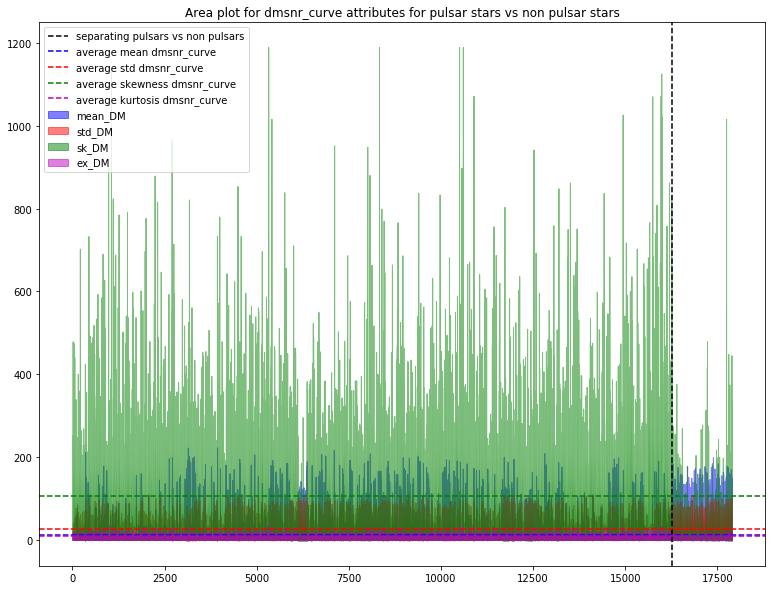

In [29]:
# Area plot for DM-SNR curves of Type 0 and Type 1 


plt.figure(figsize=(13,10))
plt.stackplot(new.index,new["mean_DM"],
              color="b",alpha=.5,labels=["mean_DM"])
plt.stackplot(new.index,new["std_DM"],
              color="r",alpha=.5,labels=["std_DM"])
plt.stackplot(new.index,new["sk_DM"],color="g",
              alpha=.5,labels=["sk_DM"])
plt.stackplot(new.index,new["ex_DM"],color="m",
              alpha=.5,labels=["ex_DM"])
plt.axvline(x=16259,color = "black",linestyle="dashed",
            label = "separating pulsars vs non pulsars")
plt.axhline(new["mean_DM"].mean(),color = "b",linestyle="dashed",
            label = "average mean dmsnr_curve")
plt.axhline(new["std_DM"].mean(),color = "r",
            linestyle="dashed",label = "average std dmsnr_curve")
plt.axhline(new["sk_DM"].mean(),color = "g",
            linestyle="dashed",label = "average skewness dmsnr_curve")
plt.axhline(new["ex_DM"].mean(),color = "m",
            linestyle="dashed",label = "average kurtosis dmsnr_curve")
plt.legend(loc="best")
plt.title("Area plot for dmsnr_curve attributes for pulsar stars vs non pulsar stars")
plt.show()

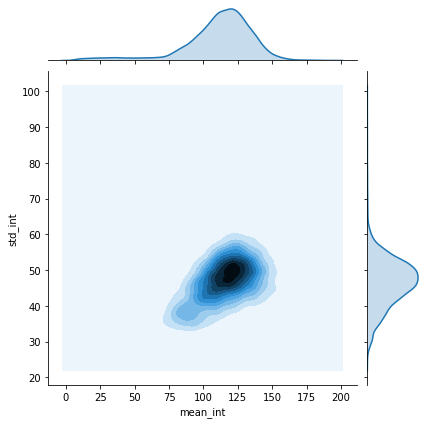

In [30]:
# Density plot between mean_info and std_info
sns.jointplot(pulsar["mean_int"],pulsar["std_int"],kind="kde",scale=10)
plt.show()

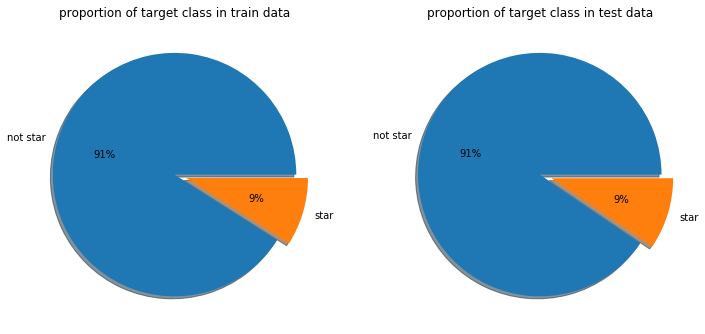

In [14]:
# Proportion of target class in train and test data
from sklearn.model_selection import train_test_split

train , test = train_test_split(pulsar,test_size = .3,random_state = 123)

plt.figure(figsize=(12,6))
plt.subplot(121)
train["target_class"].value_counts().plot.pie(labels = ["not star","star"],
                                              autopct = "%1.0f%%",
                                              shadow = True,explode=[0,.1])
plt.title("proportion of target class in train data")
plt.ylabel("")
plt.subplot(122)
test["target_class"].value_counts().plot.pie(labels = ["not star","star"],
                                             autopct = "%1.0f%%",
                                             shadow = True,explode=[0,.1])
plt.title("proportion of target class in test data")
plt.ylabel("")
plt.show()

In [15]:
#Seperating Predictor and target variables
train_X = train[[x for x in train.columns if x not in ["target_class"]]]
train_Y = train[["target_class"]]
test_X  = test[[x for x in test.columns if x not in ["target_class"]]]
test_Y  = test[["target_class"]]


In [35]:
#MODEL FUNCTION

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

def model(algorithm,dtrain_x,dtrain_y,dtest_x,dtest_y,of_type):
    
    print ("*****************************************************************************************")
    print ("MODEL - OUTPUT")
    print ("*****************************************************************************************")
    algorithm.fit(dtrain_x,dtrain_y)
    predictions = algorithm.predict(dtest_x)
    
    print (algorithm)
    print ("\naccuracy_score :",accuracy_score(dtest_y,predictions))
    
    print ("\nclassification report :\n",(classification_report(dtest_y,predictions)))
        
    plt.figure(figsize=(13,10))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(dtest_y,predictions),annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title("CONFUSION MATRIX",fontsize=20)
    
    predicting_probabilites = algorithm.predict_proba(dtest_x)[:,1]
    fpr,tpr,thresholds = roc_curve(dtest_y,predicting_probabilites)
    plt.subplot(222)
    plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
    plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
    plt.legend(loc = "best")
    plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)
    
    if  of_type == "feat":
        
        dataframe = pd.DataFrame(algorithm.feature_importances_,dtrain_x.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients",ascending = False)
        plt.subplot(223)
        ax = sns.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
        plt.title("FEATURE IMPORTANCES",fontsize =20)
        for i,j in enumerate(dataframe["coefficients"]):
            ax.text(.011,i,j,weight = "bold")
    
    elif of_type == "coef" :
        
        dataframe = pd.DataFrame(algorithm.coef_.ravel(),dtrain_x.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients",ascending = False)
        plt.subplot(223)
        ax = sns.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
        plt.title("FEATURE IMPORTANCES",fontsize =20)
        for i,j in enumerate(dataframe["coefficients"]):
            ax.text(.011,i,j,weight = "bold")
            
    elif of_type == "none" :
        return (algorithm)

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

accuracy_score : 0.9772811918063314

classification report :
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4860
           1       0.91      0.84      0.88       510

    accuracy                           0.98      5370
   macro avg       0.95      0.92 

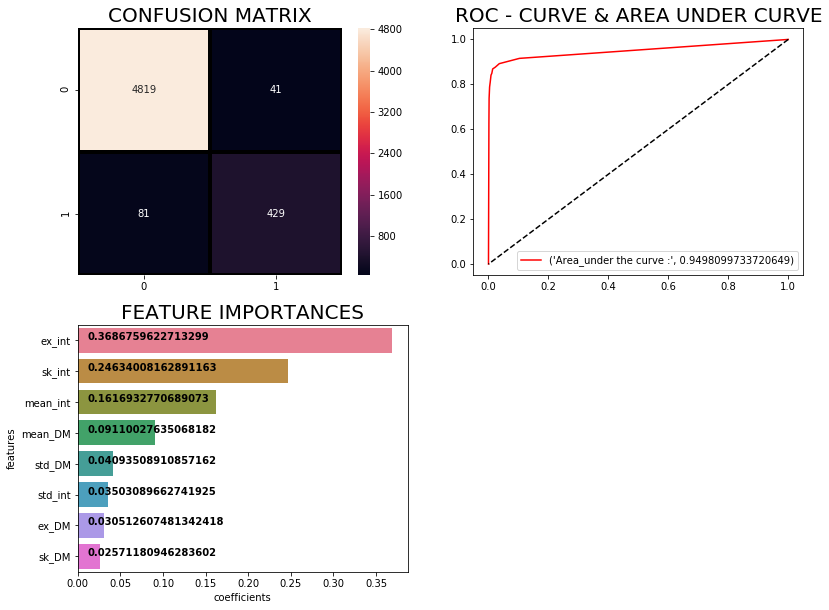

In [36]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier()
model(rf,train_X,train_Y,test_X,test_Y,"feat")

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

accuracy_score : 0.9763500931098696

classification report :
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4860
           1       0.93      0.82      0.87       510

    accuracy                           0.98      5370
   macro avg       0.95      0.90      0.93      5370
weighted avg       0.98      0.98      0.98      5370



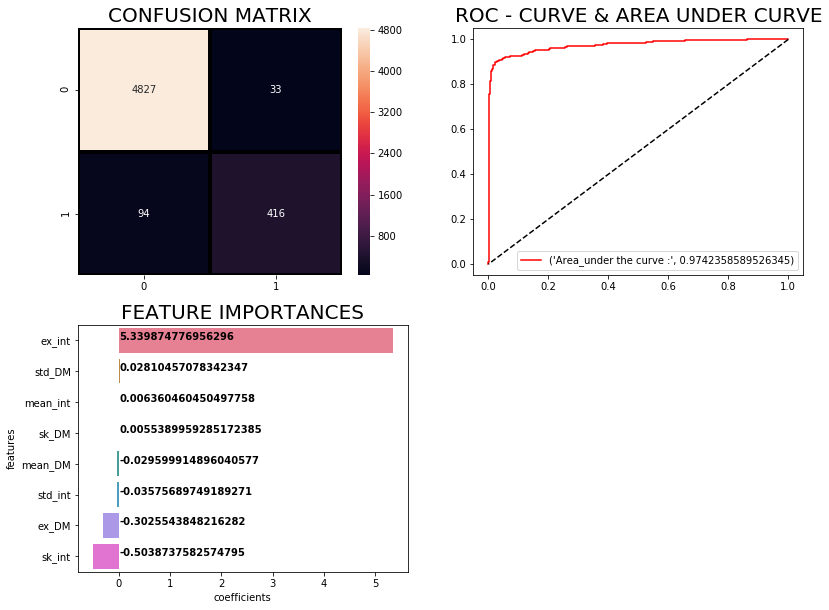

In [37]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
model(log,train_X,train_Y,test_X,test_Y,"coef")

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

accuracy_score : 0.964245810055866

classification report :
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4860
           1       0.80      0.82      0.81       510

    accuracy                           0.96      5370
   macro avg       0.89      0.90      0.90      5370
weighted avg       0.96      0.96      0.96      5370



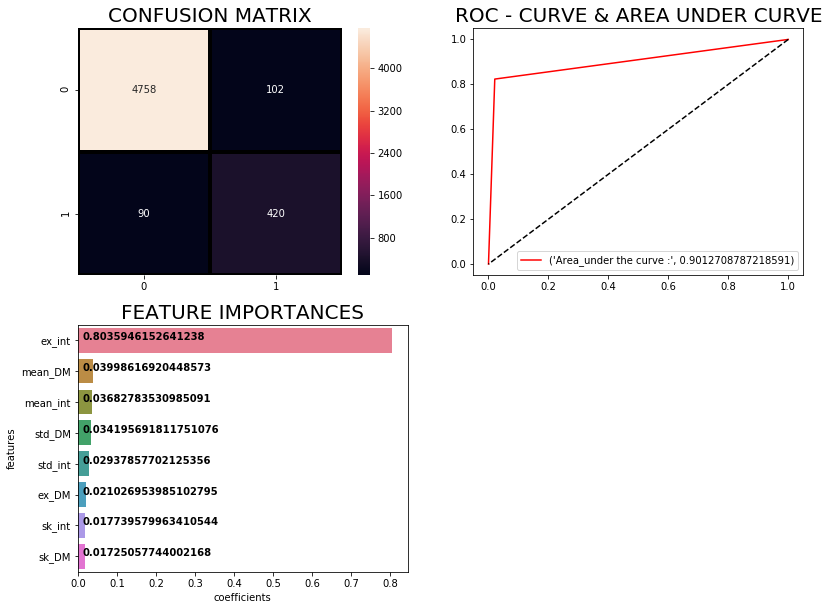

In [38]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model(dt,train_X,train_Y,test_X,test_Y,"feat")

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=None,
                    splitter='random')

accuracy_score : 0.9638733705772812

classification report :
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4860
           1       0.81      0.80      0.81       510

    accuracy                           0.96      5370
   macro avg       0.90      0.89      0.89      5370
weighted avg       0.96      0.96      0.96      5370



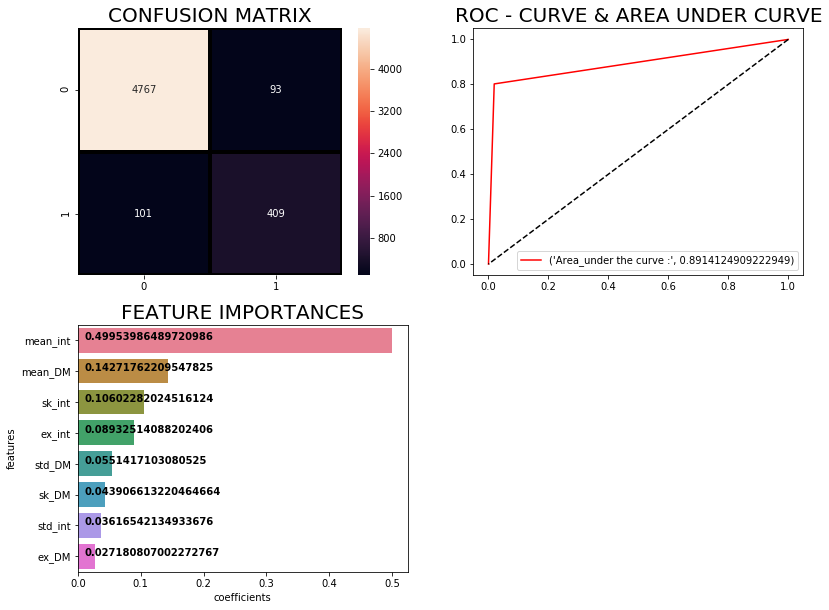

In [39]:
# Extra Tree Classifier
from sklearn.tree import ExtraTreeClassifier
etc = ExtraTreeClassifier()
model(etc,train_X,train_Y,test_X,test_Y,"feat")

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

accuracy_score : 0.9752327746741155

classification report :
               precision    recall  f1-score   support

           

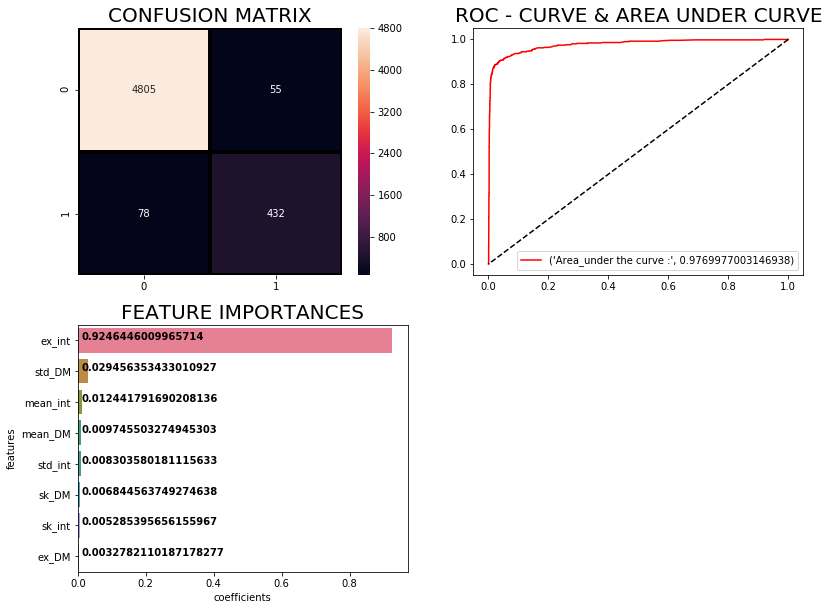

In [40]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
model(gbc,train_X,train_Y,test_X,test_Y,"feat")

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
GaussianNB(priors=None, var_smoothing=1e-09)

accuracy_score : 0.9379888268156424

classification report :
               precision    recall  f1-score   support

           0       0.98      0.95      0.97      4860
           1       0.63      0.83      0.72       510

    accuracy                           0.94      5370
   macro avg       0.81      0.89      0.84      5370
weighted avg       0.95      0.94      0.94      5370



GaussianNB(priors=None, var_smoothing=1e-09)

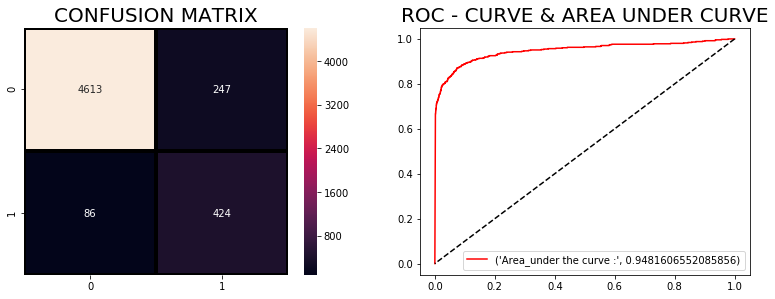

In [41]:
# Gaussian NB
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
model(nb,train_X,train_Y,test_X,test_Y,"none")

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

accuracy_score : 0.9694599627560522

classification report :
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      4860
           1       0.89      0.78      0.83       510

    accuracy                           0.97      5370
   macro avg       0.93      0.88      0.91      5370
weighted avg       0.97      0.97      0.97      5370



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

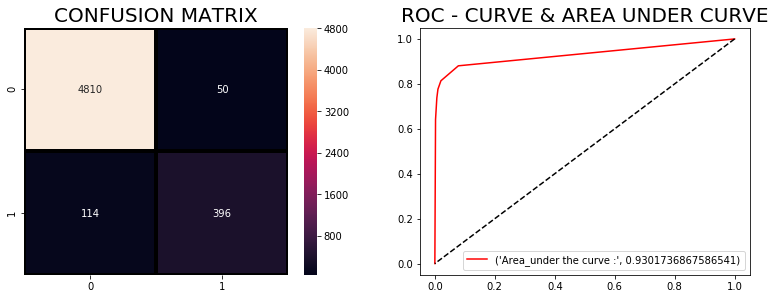

In [42]:
# K-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
model(knn,train_X,train_Y,test_X,test_Y,"none")